# Two-dimensional wave equation

#### Imports

In [144]:
import numpy as np;
from mpl_toolkits.mplot3d import Axes3D;
import numpy as np;
import numpy.linalg as linalg;
import math;
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

from ipywidgets import *;

import meshGenerator as mg;



#### Constants

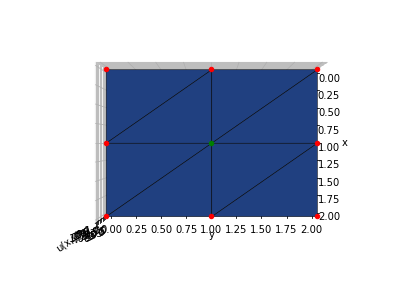

In [145]:
# Constant
c = 1;

# Delta time
dt = 0.001;

# Iterations
iterations = 10000;

# Mesh

def trans1(x,y):
    return (2*x, y-x+1);

xs, ys, bs, triang = mg.square(2,2);
xs, ys = mg.scale(xs, ys, 2.0)
N = len(triang);
n = len(xs)

#Plot mesh
fig = plt.figure();

ax = fig.add_subplot(111, projection='3d');
ax.set_ylim([0, 2]);
ax.set_xlim([0, 2]);
ax.set_zlim([-1, 1]);

ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('u(x,y)');

for (ind1, ind2, ind3) in triang:
    x = [xs[ind1], xs[ind2], xs[ind3]];
    y = [ys[ind1], ys[ind2], ys[ind3]];
    z = [0, 0, 0];
    ax.plot_trisurf(x, y, z, linewidth=0.5, edgecolor=(0.0,0.0,0.0), color=(0.25, 0.5, 1.0), shade = True);
    
for i in range(0, len(xs)):
    if(bs[i]):
        ax.scatter(xs[i], ys[i], c='r', marker='o');
    else:
        ax.scatter(xs[i], ys[i], c='g', marker='o');

ax.view_init(90, 0);  
plt.show();

#### Local basis integrals

In [146]:
A = [[1/12 , -1/24, -1/24],
     [-1/24, 1/4  , 1/8  ],
     [-1/24, 1/8  , 1/12]];

Ad = [[1   , -1/2, -1/2],
      [-1/2, 1/2 , 0   ],
      [-1/2, 0   , 1/2 ]];

#### Matrix construction

In [147]:
T = np.zeros((n, n));
S = np.zeros((n, n));

for (ind1, ind2, ind3) in triang:
    inds = [ind1, ind2, ind3];
    J = (xs[ind2]-xs[ind1])*(ys[ind3]-ys[ind1]) - (xs[ind3] - xs[ind1])*(ys[ind2] - ys[ind1]);
    for i in range(0, 3):
        for j in range(0, 3):
            T[inds[i], inds[j]] += J*A[i][j];
            S[inds[i], inds[j]] += J*Ad[i][j];

Tc = T.copy();
Sc = S.copy();

for i in range(0, n):
    if(bs[i]):
        for j in range(0, n):
            S[i,j] = 0;
            if(i == j):
                T[i, j] = 1;
            else:
                T[i, j] = 0;

#### Iteration

In [148]:
# A single time step
def iteration(v, vDer):
    vNew = v + dt*vDer;
    q = -c*c*S@v;
    r = linalg.solve(T, q);
    vDerNew = vDer + dt*r;
    return (vNew, vDerNew);

#### Energy

In [149]:
def energy(u, uDer):
    su = 0;
    for i in range(0, n):
        for j in range(0, n):
            su += Tc[i][j] * uDer[i] * uDer[j];
            su += Sc[i][j] * c * c * u[i] * u[j];
    return su;

#### Initial value

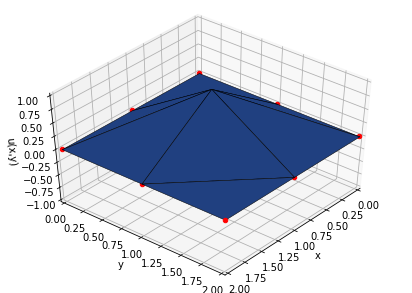

In [150]:
k1 = 1;
k2 = 1;

# The initial value solution
def initialU(x, y):
    return math.cos(((k1*x)-1.0)*(math.pi/2.0))*math.cos(((k2*y)-1.0)*(math.pi/2.0));
    
u = np.zeros((n, 1));
uDer = np.zeros((n, 1));

for i in range(0, n):
    if(not bs[i]):
        u[i] = initialU(xs[i], ys[i]);
    else:
        u[i] = 0;
    uDer[i] = 0;

# Print initial value

fig = plt.figure();

ax = fig.add_subplot(111, projection='3d');
ax.set_ylim([0, 2]);
ax.set_xlim([0, 2]);
ax.set_zlim([-1, 1]);

ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('u(x,y)');

for (ind1, ind2, ind3) in triang:
    x = [xs[ind1]  , xs[ind2]  , xs[ind3]  ];
    y = [ys[ind1]  , ys[ind2]  , ys[ind3]  ];
    z = [u[ind1][0], u[ind2][0], u[ind3][0]];
    ax.plot_trisurf(x, y, z, linewidth=0.5, edgecolor=(0.0,0.0,0.0), color=(0.25, 0.5, 1.0), shade = True);
    
for i in range(0, len(xs)):
    if(bs[i]):
        ax.scatter(xs[i], ys[i], c='r', marker='o');
    else:
        ax.scatter(xs[i], ys[i], c='g', marker='o');
        
ax.view_init(45, 40);  
plt.show();

#### Interactive Simulation

In [151]:
data = [];
en = [];
data.append(u);
en.append(energy(u, uDer))
spacing = np.linspace(0.0, 1.0, n);
bigspacing = np.linspace(0.0, 1.0, 100);

for i in range(0, iterations):
    (uNew, uDerNew) = iteration(u, uDer);
    u = uNew;
    uDer = uDerNew;
    data.append(u);
    en.append(energy(u, uDer))


In [152]:
def animation(t):
    fig = plt.figure();
    
    plt.rcParams["figure.figsize"] = (7,5)
    
    ax = fig.add_subplot(111, projection='3d');
    ax.set_ylim([0, 2]);
    ax.set_xlim([0, 2]);
    ax.set_zlim([-1, 1]);
    
    ax.set_title("t = " + str(t*dt), y = 1.08)
    
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    # ax.set_zlabel('u(x,y)');
    
    ax.view_init(45, 45);  
    ax.set_proj_type('ortho')

    z = [];
    for [val] in data[t]:
        z+=[val];
    ax.view_init(35, -45);  
    ax.plot_trisurf(xs, ys, z, triangles = triang, linewidth=0.5, edgecolor=(0.0,0.0,0.0), color=(0.25, 0.5, 1.0), shade = True);
    plt.xticks(np.arange(0, 2.1, step=0.5))
    plt.yticks(np.arange(0, 2.1, step=0.5))
    ax.set_zticks(np.arange(-1, 1.1, step=0.5));
    
interact(animation, t = widgets.IntSlider(min = 0, max = iterations, step = 100, value = 0));

interactive(children=(IntSlider(value=0, description='t', max=10000, step=100), Output()), _dom_classes=('widget-interact',))

In [155]:
def animation(t):
    fig = plt.figure();
    
    plt.rcParams["figure.figsize"] = (7,5)
    
    plt.ylim([0, 2]);
    plt.xlim([0, 2]);
    
    plt.title("t = " + str(t*dt), y = 1.08)
    
    plt.xlabel('x');
    plt.ylabel('y');
    
    z = [];
    for i in range(0, len(xs)):
        z+= [data[t][i][0]];
        
    v = np.linspace(-1.1, 1.1, 23, endpoint=True);
    
    tri = mtri.Triangulation(xs,ys,triang);
    plt.tricontourf(tri,z,v);
    plt.triplot(tri, 'k-');
    cb = plt.colorbar();
    cb.set_label('U(x,y,t)');
    
interact(animation, t = widgets.IntSlider(min = 0, max = iterations, step = 100, value = 0));

interactive(children=(IntSlider(value=0, description='t', max=10000, step=100), Output()), _dom_classes=('widget-interact',))

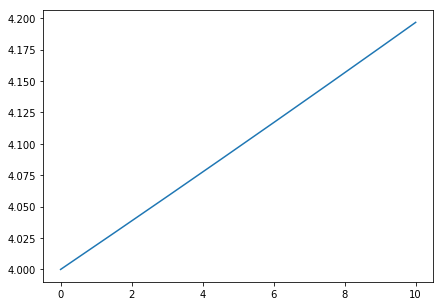

In [154]:
plt.plot(np.arange(0, dt*(iterations+0.5), dt), en);